In [77]:
# Data from the Titanic
# Matplotlib Excerice

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib notebook

In [3]:
# Loads Dataset from Seaborn
titanic = sns.load_dataset('titanic')

In [105]:
# Creates a CSV file for all the Titanic Data
titanic.to_csv(r"/home/cambam/Desktop/titanic.csv")

In [4]:
# Shape of the DataSet, 15 Columns and 891 rows of data
titanic.shape

(891, 15)

In [83]:
# This is a good way to check for missing data
# The Age and deck columns are missing data
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
AgeBin         714
dtype: int64

In [78]:
# The header and first 5 rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,AgeBin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(20, 30]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(30, 40]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"(20, 30]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(30, 40]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(30, 40]"


In [84]:
# The youngest and Oldest ages of passengers
# The youngest age was maybe given in months
# 4 months and 2 weeks or maybe 42 weeks.
titanic['age'].min(), titanic['age'].max()

(0.42, 80.0)

In [85]:
# If the passenger survived the data shows 1
# Only 342 people survived the Titanic
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [86]:
# Same thing but in percentages
titanic['survived'].value_counts() * 100 / len(titanic)

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [91]:
# Male to female passenger count
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [88]:
# Passenger count by class
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

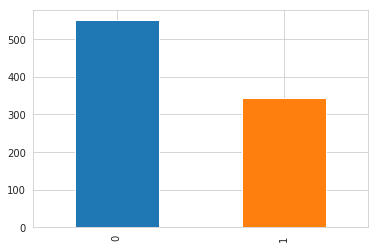

In [89]:
# Survival bar chart
titanic['survived'].value_counts().plot(kind='bar')

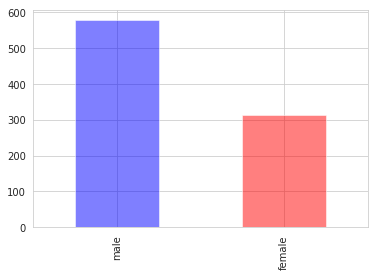

In [90]:
# Male, Female bar chart
alpha_color = 0.5
titanic['sex'].value_counts().plot(kind='bar',
                                  color=['b','r'],
                                  alpha=alpha_color)

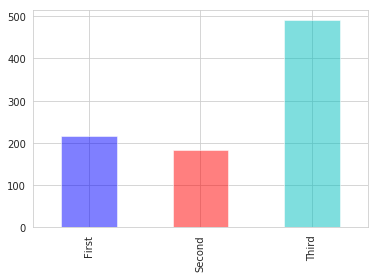

In [92]:
# Bar chart by class of passengers
titanic['class'].value_counts().sort_index().plot(kind='bar',
                                  color=['b','r','c'],
                                  alpha=alpha_color)

In [93]:
# Create a bins varible and AgeBin for charting
bins = [0,10,20,30,40,50,60,70,80]
titanic['AgeBin'] = pd.cut(titanic['age'], bins)

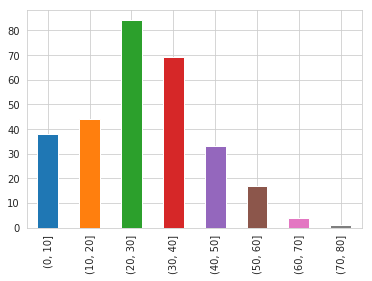

In [94]:
# Survived by age
titanic[titanic['survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

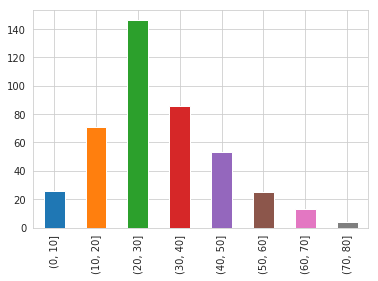

In [95]:
# Deaths by age
titanic[titanic['survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

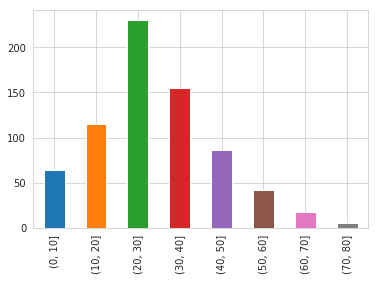

In [96]:
# All ages of every passenger
titanic['AgeBin'].value_counts().sort_index().plot(kind='bar')

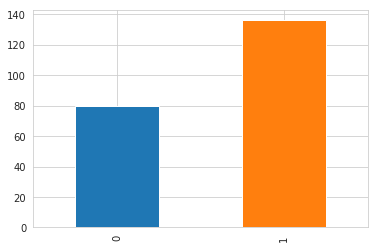

In [63]:
# Bar chart for survival/death of first class passengers
titanic[titanic['class'] == 'First']['survived'].value_counts().sort_index().plot(kind='bar')

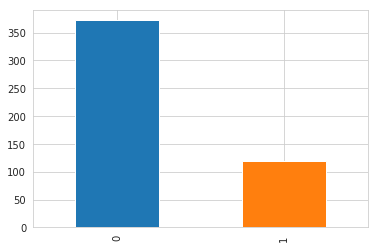

In [97]:
# Bar chart for survival/death of third class passengers
titanic[titanic['class'] == 'Third']['survived'].value_counts().sort_index().plot(kind='bar')

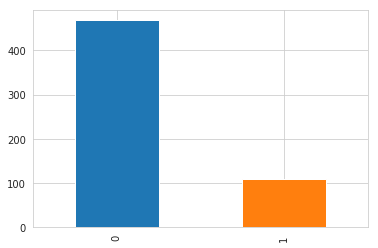

In [98]:
# Bar chart for survival/death of male passengers
titanic[titanic['sex'] == 'male']['survived'].value_counts().sort_index().plot(kind='bar')

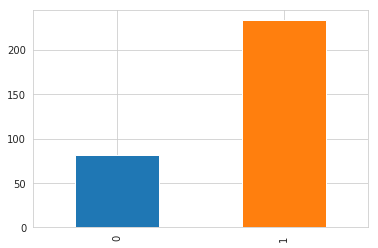

In [100]:
# Bar chart for survival/death of female passengers
titanic[titanic['sex'] == 'female']['survived'].value_counts().sort_index().plot(kind='bar')

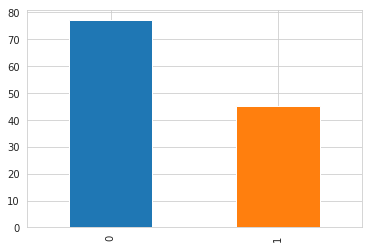

In [101]:
# Two conditions, bar chart for survival/death of male first class passengers
titanic[(titanic['sex'] == 'male') & (titanic['class'] == 'First')]['survived'].value_counts().sort_index().plot(kind='bar')

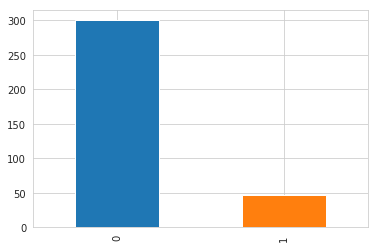

In [102]:
# Two conditions, bar chart for survival/death of male third class passengers
titanic[(titanic['sex'] == 'male') & (titanic['class'] == 'Third')]['survived'].value_counts().sort_index().plot(kind='bar')

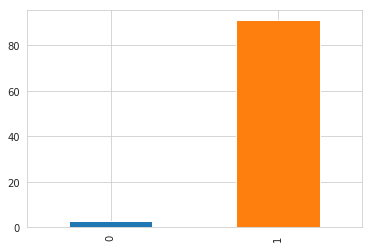

In [103]:
# Two conditions, bar chart for survival/death of female first class passengers
titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'First')]['survived'].value_counts().sort_index().plot(kind='bar')

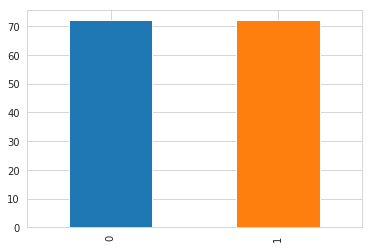

In [104]:
# Two conditions, bar chart for survival/death of female third class passengers
titanic[(titanic['sex'] == 'female') & (titanic['class'] == 'Third')]['survived'].value_counts().sort_index().plot(kind='bar')

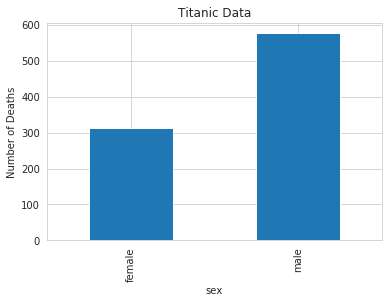

In [42]:
df = titanic.groupby('sex')[['survived']].count()
df.plot.bar()
plt.ylabel('Number of Deaths')
plt.title('Titanic Data')
plt.legend().remove()

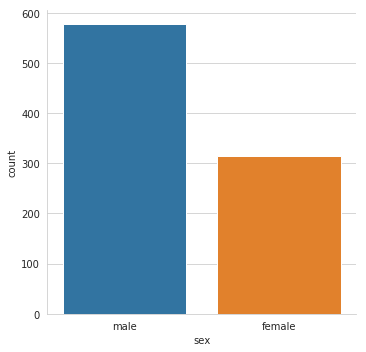

In [39]:
# A different way to see the same data

sns.factorplot('sex',data=titanic,kind='count')

In [10]:
# Creating a DataFrame to plot
result = pd.pivot_table(titanic, index='survived', 
                        columns='sex', 
                        values='pclass',
                        aggfunc=np.sum)

In [11]:
# confirming the DataFrame information is correct
# type(result)
result

sex,female,male
survived,,
0,231,1159
1,447,220


Text(0.5,1,'Titanic Data')

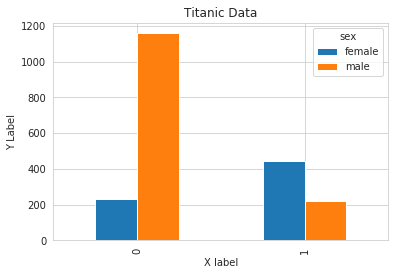

In [12]:
# Plotting the DataFrame 
result.plot.bar()
plt.ylabel('Y Label')
plt.xlabel('X label')
plt.title('Titanic Data')

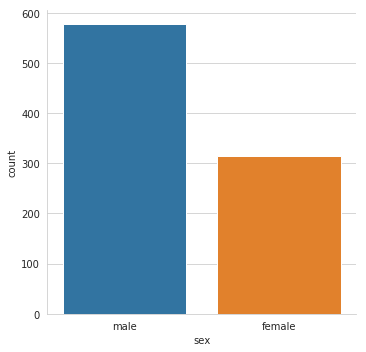

In [13]:
sns.factorplot('sex',data=titanic,kind='count')

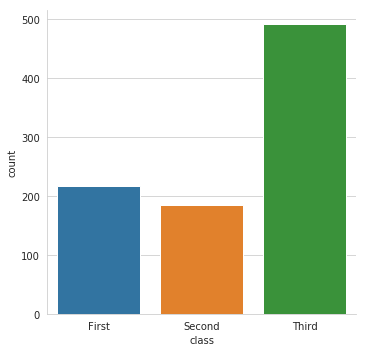

In [14]:
#Bar chart showing the number of passengers by class
sns.factorplot('class', data=titanic, kind='count')

In [15]:
# Creating a DataFrame to plot how many survived by class
result = pd.pivot_table(titanic, index='pclass', 
                        columns='sex', 
                        values='survived',
                        aggfunc=np.sum)

In [16]:
result

sex,female,male
pclass,,
1,91,45
2,70,17
3,72,47


Text(0.5,1,'Titanic Data')

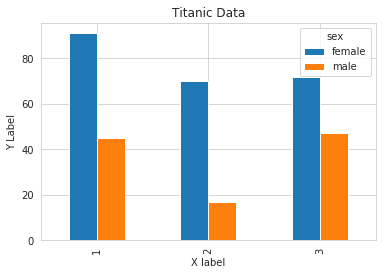

In [17]:
result.plot.bar()
plt.ylabel('Y Label')
plt.xlabel('X label')
plt.title('Titanic Data')

In [18]:
# Here I'm finding the women and men that dead by class

In [19]:
w_d_1 = (titanic['sex'] == 'female') & (titanic['survived'] == 0) & (titanic['class'] == 'First')

In [20]:
w_d_2 = (titanic['sex'] == 'female') & (titanic['survived'] == 0) & (titanic['class'] == 'Second')

In [21]:
w_d_3 = (titanic['sex'] == 'female') & (titanic['survived'] == 0) & (titanic['class'] == 'Third')

In [22]:
print(w_d_1.sum(), w_d_2.sum(), w_d_3.sum())

3 6 72


In [23]:
m_d_1 = (titanic['sex'] == 'male') & (titanic['survived'] == 0) & (titanic['class'] == 'First')

In [24]:
m_d_2 = (titanic['sex'] == 'male') & (titanic['survived'] == 0) & (titanic['class'] == 'Second')

In [25]:
m_d_3 = (titanic['sex'] == 'male') & (titanic['survived'] == 0) & (titanic['class'] == 'Third')

In [26]:
print(m_d_1.sum(), m_d_2.sum(), m_d_3.sum())

77 91 300
